<a href="https://colab.research.google.com/github/Meghana-5C3/Thriftstore1/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip fake_news_dataset.zip -d dataset


Archive:  fake_news_dataset.zip
replace dataset/Testing_dataset/testingSet/Catalog - Fake Articles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/Testing_dataset/testingSet/Catalog - Fake Articles.csv  
  inflating: dataset/Testing_dataset/testingSet/Catalog - Real Articles.csv  
  inflating: dataset/Testing_dataset/testingSet/exam.sh  
  inflating: dataset/Testing_dataset/testingSet/fake/0.txt  
  inflating: dataset/Testing_dataset/testingSet/fake/1.txt  
  inflating: dataset/Testing_dataset/testingSet/fake/10.txt  
  inflating: dataset/Testing_dataset/testingSet/fake/11.txt  
  inflating: dataset/Testing_dataset/testingSet/fake/12.txt  
  inflating: dataset/Testing_dataset/testingSet/fake/13.txt  
  inflating: dataset/Testing_dataset/testingSet/fake/14.txt  
  inflating: dataset/Testing_dataset/testingSet/fake/15.txt  
  inflating: dataset/Testing_dataset/testingSet/fake/16.txt  
  inflating: dataset/Testing_dataset/testingSet/fake/17.txt  
  inflating: dataset/Tes

In [ ]:
!git clone https://github.com/AtharvaKulkarniIT/Fake-News-Detection-using-Machine-Learning.git

fatal: destination path 'Fake-News-Detection-using-Machine-Learning' already exists and is not an empty directory.


Loading the Dataset

In [ ]:
!pip install gensim nltk scikit-learn pandas numpy matplotlib seaborn plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
import os
import pandas as pd

fake_folder = "dataset/training/training/fakeNewsDataset/fake"
real_folder = "dataset/training/training/fakeNewsDataset/legit"

def read_files(folder):
    texts = []
    for file in os.listdir(folder):
        with open(os.path.join(folder, file), "r", errors="ignore") as f:
            texts.append(f.read())
    return texts

fake_texts = read_files(fake_folder)
real_texts = read_files(real_folder)

df_fake = pd.DataFrame({"text": fake_texts, "label": 0})
df_real = pd.DataFrame({"text": real_texts, "label": 1})

df_fake.to_csv("Fake.csv", index=False)
df_real.to_csv("True.csv", index=False)

print("Fake.csv and True.csv created successfully")

Fake.csv and True.csv created successfully


In [ ]:
df_true = pd.read_csv("/content/True.csv")
df_fake = pd.read_csv("/content/Fake.csv")

Setting up a target and merging both datasets

In [ ]:
df_true['target'] = 1
df_fake['target'] = 0
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df['original'] = df['text']
df.head()

,text,label,target,original
0,AQAP trying to hide explosives in laptop batte...,1,1,AQAP trying to hide explosives in laptop batte...
1,Betsy DeVos's Education Hearing Erupts Into Pa...,1,1,Betsy DeVos's Education Hearing Erupts Into Pa...
2,Survey: Most Freshmen Are Not Emotionally Prep...,1,1,Survey: Most Freshmen Are Not Emotionally Prep...
3,Schwarzenegger taunts Trump over approval rati...,1,1,Schwarzenegger taunts Trump over approval rati...
4,Slaven Bilic still has support of West Ham's ...,1,1,Slaven Bilic still has support of West Ham's ...


Checking the number of null values

In [ ]:
df.isnull().sum()

,0
text,0
label,0
target,0
original,0


Some Data cleaning

In [ ]:
nltk.download('stopwords')

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)

    return result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.subject="news"

EXPLORATORY DATA ANALYSIS - EDA

1. Distribution of true and fake news

In [ ]:
# ---- DATASET COMPATIBILITY FIX ----

# create missing columns if not present
if 'title' not in df.columns:
    df['title'] = ''

if 'subject' not in df.columns:
    df['subject'] = 'news'

In [ ]:
sub_tf_df=df.groupby('target').apply(lambda x:x['text'].count()).reset_index(name='Counts')
sub_tf_df.target.replace({0:'False',1:'True'},inplace=True)
fig = px.bar(sub_tf_df, x="target", y="Counts",
             color='Counts', barmode='group',
             height=400)
fig.show()

/tmp/ipython-input-2192676344.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_tf_df=df.groupby('target').apply(lambda x:x['text'].count()).reset_index(name='Counts')
/tmp/ipython-input-2192676344.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the or

2. What issues have been most covered in the news?

In [ ]:
sub_check=df.groupby('subject').apply(lambda x:x['title'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Count of News Articles by Subject')
fig.show()

/tmp/ipython-input-2052069767.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



3. Word Cloud

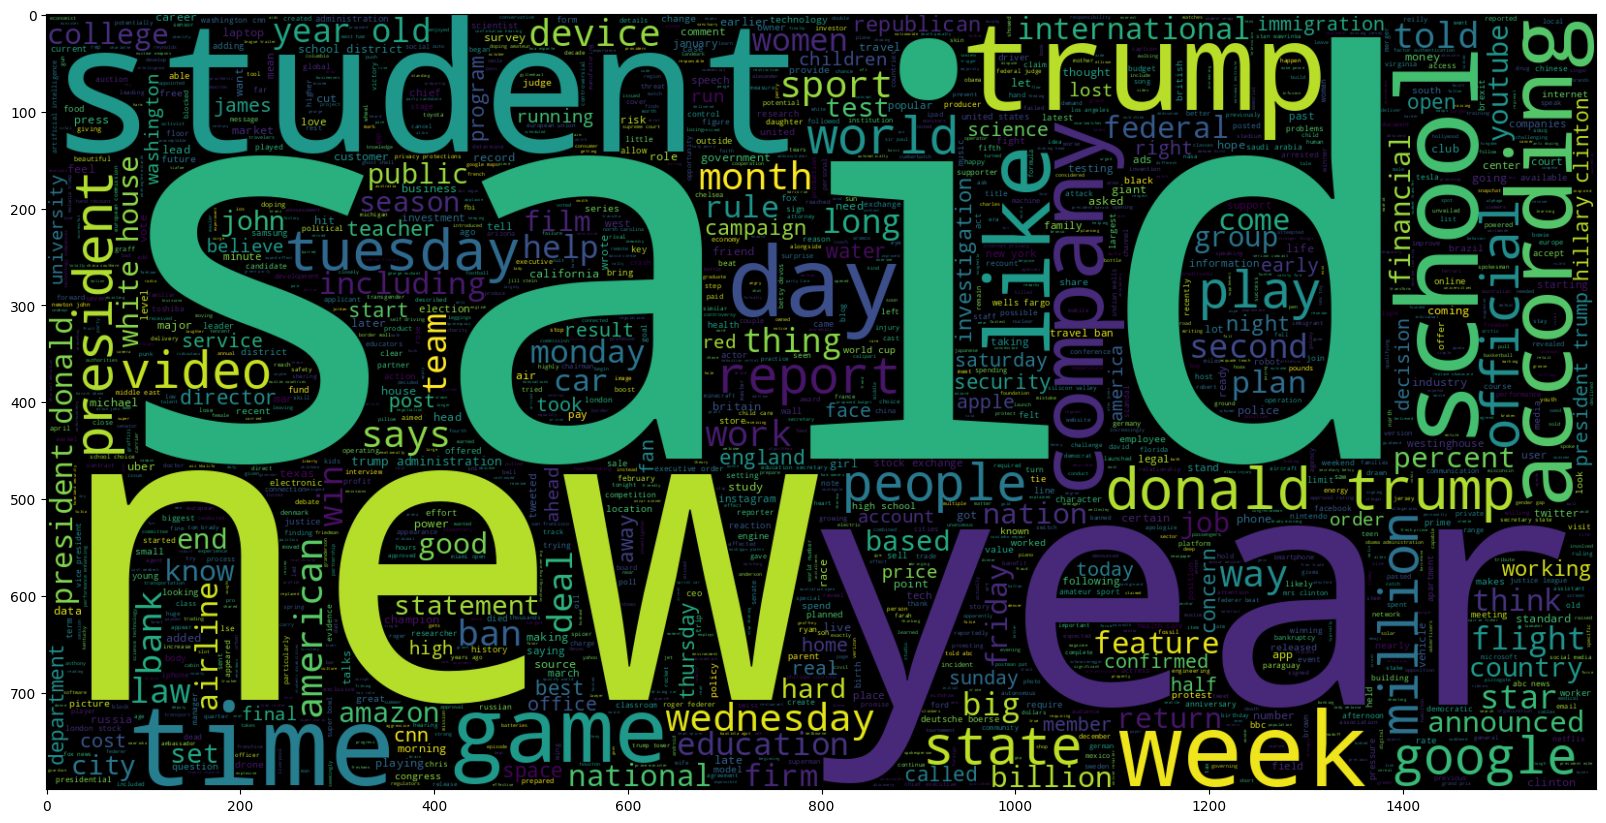

In [ ]:
df['clean_title'] = df['text'].apply(preprocess)
df['clean_title'][0]
df['clean_joined_title']=df['clean_title'].apply(lambda x:" ".join(x))
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.target == 1].clean_joined_title))
plt.imshow(wc, interpolation = 'bilinear')

4. Maximum count of words in a title

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
nltk.download('punkt')
maxlen = -1
for doc in df.clean_joined_title:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a title is =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined_title], nbins = 50)
fig.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The maximum number of words in a title is = 142


In [ ]:
df

,text,label,target,original,title,subject,clean_title,clean_joined_title
0,AQAP trying to hide explosives in laptop batte...,1,1,AQAP trying to hide explosives in laptop batte...,,news,"[aqap, trying, hide, explosives, laptop, batte...",aqap trying hide explosives laptop batteries o...
1,Betsy DeVos's Education Hearing Erupts Into Pa...,1,1,Betsy DeVos's Education Hearing Erupts Into Pa...,,news,"[betsy, devos, education, hearing, erupts, par...",betsy devos education hearing erupts partisan ...
2,Survey: Most Freshmen Are Not Emotionally Prep...,1,1,Survey: Most Freshmen Are Not Emotionally Prep...,,news,"[survey, freshmen, emotionally, prepared, coll...",survey freshmen emotionally prepared college h...
3,Schwarzenegger taunts Trump over approval rati...,1,1,Schwarzenegger taunts Trump over approval rati...,,news,"[schwarzenegger, taunts, trump, approval, rati...",schwarzenegger taunts trump approval rating ca...
4,Slaven Bilic still has support of West Ham's ...,1,1,Slaven Bilic still has support of West Ham's ...,,news,"[slaven, bilic, support, west, ham, owners, we...",slaven bilic support west ham owners west ham ...
...,...,...,...,...,...,...,...,...
475,Apple Says Kids Under 5 - Free For Life\n\nApp...,0,0,Apple Says Kids Under 5 - Free For Life\n\nApp...,,news,"[apple, says, kids, free, life, apple, committ...",apple says kids free life apple committing app...
476,Planet Earth canceled after Bafta scandal\n\nD...,0,0,Planet Earth canceled after Bafta scandal\n\nD...,,news,"[planet, earth, canceled, bafta, scandal, desp...",planet earth canceled bafta scandal despite ea...
477,Baseball Is The Least Favorite Sport to the Me...,0,0,Baseball Is The Least Favorite Sport to the Me...,,news,"[baseball, favorite, sport, mets, granderson, ...",baseball favorite sport mets granderson minute...
478,"To Nurse or Not to Nurse,That is the Question\...",0,0,"To Nurse or Not to Nurse,That is the Question\...",,news,"[nurse, nurse, question, controversy, breast, ...",nurse nurse question controversy breast feedin...


Data Preprocessing

In [ ]:
import re
def wordopt(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df["text"] = df["text"].apply(wordopt)

<>:3: SyntaxWarning:

invalid escape sequence '\['

<>:5: SyntaxWarning:

invalid escape sequence '\S'

<>:8: SyntaxWarning:

invalid escape sequence '\w'

<>:3: SyntaxWarning:

invalid escape sequence '\['

<>:5: SyntaxWarning:

invalid escape sequence '\S'

<>:8: SyntaxWarning:

invalid escape sequence '\w'

/tmp/ipython-input-1453710720.py:3: SyntaxWarning:

invalid escape sequence '\['

/tmp/ipython-input-1453710720.py:5: SyntaxWarning:

invalid escape sequence '\S'

/tmp/ipython-input-1453710720.py:8: SyntaxWarning:

invalid escape sequence '\w'



Model Building

Train test split

In [ ]:
x = df["text"]
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       0.39      0.48      0.43        56
           1       0.43      0.34      0.38        64

    accuracy                           0.41       120
   macro avg       0.41      0.41      0.41       120
weighted avg       0.41      0.41      0.41       120



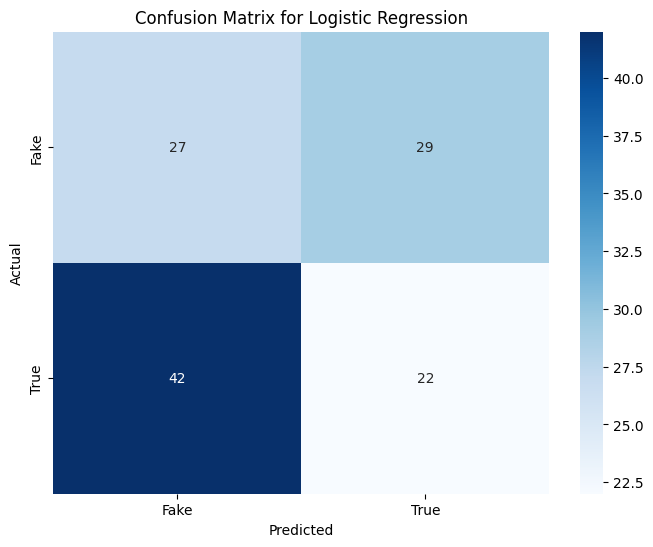

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

print(classification_report(y_test, pred_lr))

confusion_mat = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Decision Tree Classifier

Accuracy: 56.67%
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        56
           1       0.61      0.52      0.56        64

    accuracy                           0.57       120
   macro avg       0.57      0.57      0.57       120
weighted avg       0.57      0.57      0.57       120



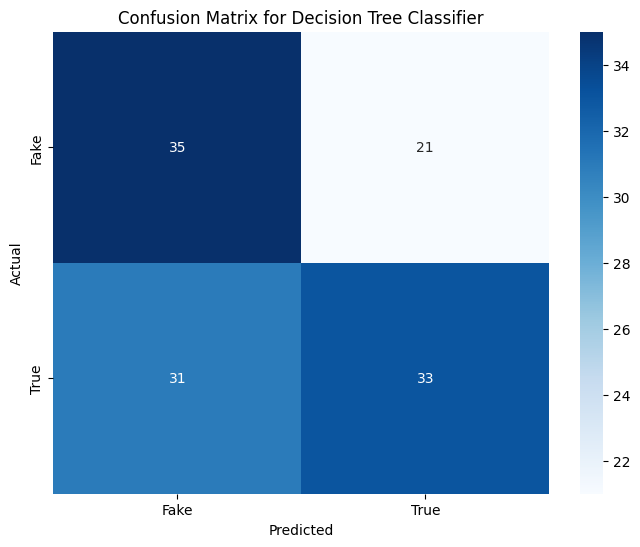

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

pred_dt = DT.predict(xv_test)
accuracy = DT.score(xv_test, y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(classification_report(y_test, pred_dt))

confusion_mat = confusion_matrix(y_test, pred_dt)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

Gradient Boosting Classifier

Accuracy: 64.17%
              precision    recall  f1-score   support

           0       0.62      0.61      0.61        56
           1       0.66      0.67      0.67        64

    accuracy                           0.64       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.64      0.64      0.64       120



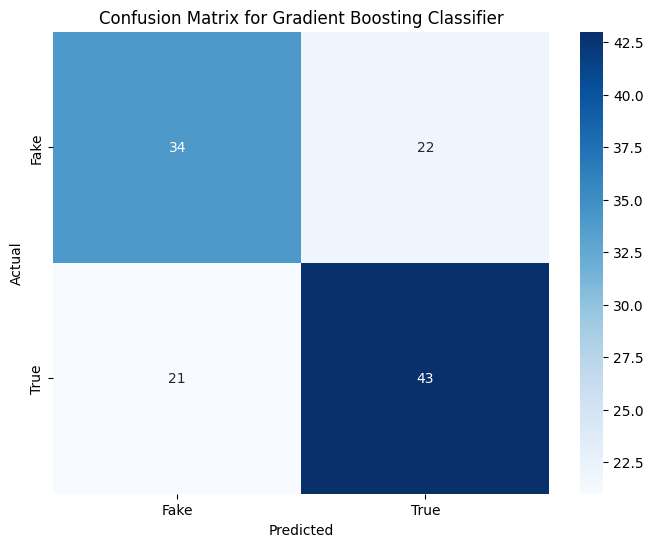

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

pred_gbc = GBC.predict(xv_test)
accuracy = GBC.score(xv_test, y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(classification_report(y_test, pred_gbc))

confusion_mat = confusion_matrix(y_test, pred_gbc)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

Random Forest Classfier

Accuracy: 58.33%
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        56
           1       0.65      0.48      0.55        64

    accuracy                           0.58       120
   macro avg       0.59      0.59      0.58       120
weighted avg       0.60      0.58      0.58       120



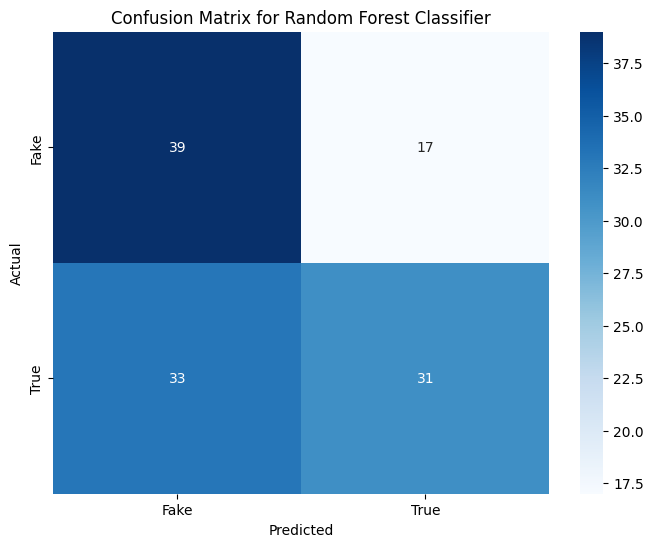

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

pred_rfc = RFC.predict(xv_test)
accuracy = RFC.score(xv_test, y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")
print(classification_report(y_test, pred_rfc))

confusion_mat = confusion_matrix(y_test, pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

Taking Manual Inputs

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))



Hindi to English news translation

In [ ]:
!pip3 uninstall googletrans
!pip3 install googletrans==3.1.0a0
from googletrans import Translator, constants
from pprint import pprint

def translation (text):

 translator = Translator()

 translation = translator.translate(text, dest="en")
 print(translation.text)

Found existing installation: googletrans 3.1.0a0
Uninstalling googletrans-3.1.0a0:
  Would remove:
    /usr/local/bin/translate
    /usr/local/lib/python3.12/dist-packages/googletrans-3.1.0a0.dist-info/*
    /usr/local/lib/python3.12/dist-packages/googletrans/*
Proceed (Y/n)? n


Giving user a menu

In [ ]:
!pip install deep-translator
from deep_translator import GoogleTranslator

def translation(text):
    return GoogleTranslator(source='auto', target='en').translate(text)

In [ ]:
def manual_testing(news):
    news = news.lower()
    news = preprocess(news)
    news_vector = vectorizer.transform([news])
    prediction = model.predict(news_vector)

    if prediction[0] == 1:
        print(" This news is REAL")
    else:
        print(" This news is FAKE")

In [ ]:
#@title Fake News Detection

text = '\u0928\u0908 \u0926\u093F\u0932\u094D\u0932\u0940: \u0905\u092E\u0947\u0930\u093F\u0915\u093E \u0914\u0930 \u091A\u0940\u0928 \u0915\u0947 \u092C\u0940\u091A \u092A\u0930\u092E\u093E\u0923\u0941 \u0939\u0925\u093F\u092F\u093E\u0930 \u0928\u093F\u092F\u0902\u0924\u094D\u0930\u0923 \u0935\u093E\u0930\u094D\u0924\u093E (US China On Nuclear Arms Control) \u092A\u0930 \u0938\u0939\u092E\u0924\u093F \u092C\u0928 \u0917\u0908 \u0939\u0948. \u0926\u094B\u0928\u094B\u0902 \u0915\u0947 \u092C\u0940\u091A \u092F\u0947 \u092C\u093E\u0924\u091A\u0940\u0924 \u0905\u0917\u0932\u0947 \u0939\u092B\u094D\u0924\u0947 \u0939\u094B\u0917\u0940. \u0930\u0949\u092F\u091F\u0930\u094D\u0938 \u0915\u0940 \u0916\u092C\u0930 \u0915\u0947 \u092E\u0941\u0924\u093E\u092C\u093F\u0915 \u092F\u0947 \u091C\u093E\u0928\u0915\u093E\u0930\u0940 \u0935\u0949\u0932 \u0938\u094D\u091F\u094D\u0930\u0940\u091F \u091C\u0930\u094D\u0928\u0932 \u0928\u0947 \u092C\u0941\u0927\u0935\u093E\u0930 \u0915\u094B \u0926\u0940. \u0909\u0928\u094D\u0939\u094B\u0902\u0928\u0947 \u092C\u0924\u093E\u092F\u093E \u0915\u093F \u091A\u0940\u0928 \u0928\u0947 \u0905\u092E\u0947\u0930\u093F\u0915\u093E \u0915\u0947 \u0938\u093E\u0925 \u092A\u0930\u092E\u093E\u0923\u0941 \u0939\u0925\u093F\u092F\u093E\u0930 \u0928\u093F\u092F\u0902\u0924\u094D\u0930\u0923 \u0935\u093E\u0930\u094D\u0924\u093E \u0906\u092F\u094B\u091C\u093F\u0924 \u0915\u0930\u0928\u0947 \u092A\u0930 \u0938\u0939\u092E\u0924\u093F \u091C\u0924\u093E \u0926\u0940 \u0939\u0948. \u0913\u092C\u093E\u092E\u093E \u0938\u0930\u0915\u093E\u0930 \u0915\u0947 \u0938\u0924\u094D\u0924\u093E \u0938\u0947 \u091C\u093E\u0928\u0947 \u0915\u0947 \u092C\u093E\u0926 \u092A\u0939\u0932\u0940 \u092C\u093E\u0930 \u091A\u0940\u0928 \u0914\u0930 \u0905\u092E\u0947\u0930\u093F\u0915\u093E \u0915\u0947 \u092C\u0940\u091A \u092A\u0930\u092E\u093E\u0923\u0941 \u0939\u0925\u093F\u092F\u093E\u0930 \u0928\u093F\u092F\u0902\u0924\u094D\u0930\u0923 \u092A\u0930 \u092C\u093E\u0924\u091A\u0940\u0924 \u0939\u094B\u0917\u0940. \u0932\u0947\u0915\u093F\u0928 \u0926\u094B\u0928\u094B\u0902 \u0915\u0947 \u092C\u0940\u091A \u092A\u0930\u092E\u093E\u0923\u0941 \u0939\u0925\u093F\u092F\u093E\u0930\u094B\u0902 \u0915\u094B \u0938\u0940\u092E\u093F\u0924 \u0915\u0930\u0928\u0947 \u092A\u0930 \u0938\u0939\u092E\u0924\u093F \u092C\u0928\u0947\u0917\u0940' #@param {type:"string"}
dropdown = 'Hindi' #@param ["English","Hindi"]

if dropdown == 'English':
  manual_testing(text)
else:
  new_text = str(translation(text))
  print(new_text)
  manual_testing(new_text)

New Delhi: An agreement has been reached between America and China on nuclear arms control talks (US China On Nuclear Arms Control). This conversation between the two will take place next week. According to Reuters news, this information was given by the Wall Street Journal on Wednesday. He told that China has agreed to organize nuclear arms control talks with America. For the first time after the Obama government left power, there will be talks between China and America on nuclear arms control. But there will be an agreement between the two on limiting nuclear weapons.


NameError: name 'vectorizer' is not defined